# **MCA** **Semester-4 Registration Number:22307370127 KHUSHPREET SINGH**

# **Project** **Title** - **MACHINE LEARNING FOR RAINFALL PREDICTION**

## **Problem** **Statement**:

### Aim: This project aims to build a machine learning model that predicts whether it will rain based on weather data like temperature, humidity, wind, and pressure. The goal is to improve weather forecasts and help people make better decisions related to weather.

#### This project tackles the challenge of predicting rainfall by addressing it as a binary classification problem. The goal is to determine whether it will rain the next day based on available meteorological data. To achieve this, the performance of two machine learning models is compared:

(a) Logistic Regression

(b) K-Nearest Neighbors

## **Data Collection:**

#### **Data Source**:

The dataset used in this project is a CSV file named `weather.csv`, originally obtained from Kaggle.

**Original Source:** [https://www.kaggle.com/datasets/zaraavagyan/weathercsv](https://www.kaggle.com/datasets/zaraavagyan/weathercsv)

**Author:** ZARUHI AVAGYAN

#### **Dataset Description:**
It contains daily weather observations from various locations, including meteorological parameters relevant for rainfall prediction. The dataset comprises the following attributes:

- **Date:** The date of the weather record  
- **Location:** The geographical location of the weather recording  
- **MinTemp, MaxTemp, Temp9am, Temp3pm:** Minimum, maximum, 9 AM, and 3 PM temperatures (°C).
- **Rainfall:** Amount of rainfall (mm)  
- **Evaporation:** Evaporation rate (mm)  
- **Sunshine:** Hours of sunshine recorded  
- **WindGustDir, WindGustSpeed:** Direction and speed of the strongest wind gust.
- **WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm:** Wind direction and speed at 9 AM and 3 PM.
- **Humidity9am, Humidity3pm:** Humidity levels at 9 AM and 3 PM (%).
- **Pressure9am, Pressure3pm:** Atmospheric pressure at 9 AM  and 3 PM (hPa).
- **Cloud9am, Cloud3pm:** Cloud cover at 9 AM and 3 PM (Oktas - 1/8ths of sky covered by clouds).
- **RainToday:** Whether it rained today (Yes/No)  
- **RainTomorrow:** Whether it will rain tomorrow (Yes/No) _(Target Variable)_

This dataset serves as the foundation for developing a classification model to predict rainfall occurrence based on historical weather patterns.


### **Importing** **required** **packages**

In [ ]:
import numpy as np     # Importing numpy package
import pandas as pd    # Importing pandas package
import seaborn as sns  # Importing seaborn package
import matplotlib.pyplot as plt   # Importing matplotlib package

In [ ]:
# from google.colab import files

### **Reading the dataset**

In [ ]:
# Read the dataset
data = pd.read_csv("weather.csv")
data  # Displaying the dataframe

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


### **Exploratory Data Analysis (EDA)**

In [ ]:
data.shape   # To display the shape of dataframe--> no of rows and columns

(366, 22)

In [ ]:
data.columns   # Displaying the column names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
data.dtypes   # Displaying datatypes of each column

,0
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object
WindSpeed9am,float64


In [ ]:
data.info()     # Displaying info about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [ ]:
data.isnull().sum()   # Checking null values

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31
WindDir3pm,1
WindSpeed9am,7


In [ ]:
data.duplicated()     # Checking duplicated values

,0
0,False
1,False
2,False
3,False
4,False
...,...
361,False
362,False
363,False
364,False


In [ ]:
data.nunique()   # Checking unique values

,0
MinTemp,180
MaxTemp,187
Rainfall,47
Evaporation,55
Sunshine,114
WindGustDir,16
WindGustSpeed,35
WindDir9am,16
WindDir3pm,16
WindSpeed9am,22


In [ ]:
data.describe()      # Description of the dataframe

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


### **Missing** **values**

In [ ]:
data.isna().sum()    # Checking missing values

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31
WindDir3pm,1
WindSpeed9am,7


In [ ]:
import missingno as msno    # Importing missingno package

<Axes: >

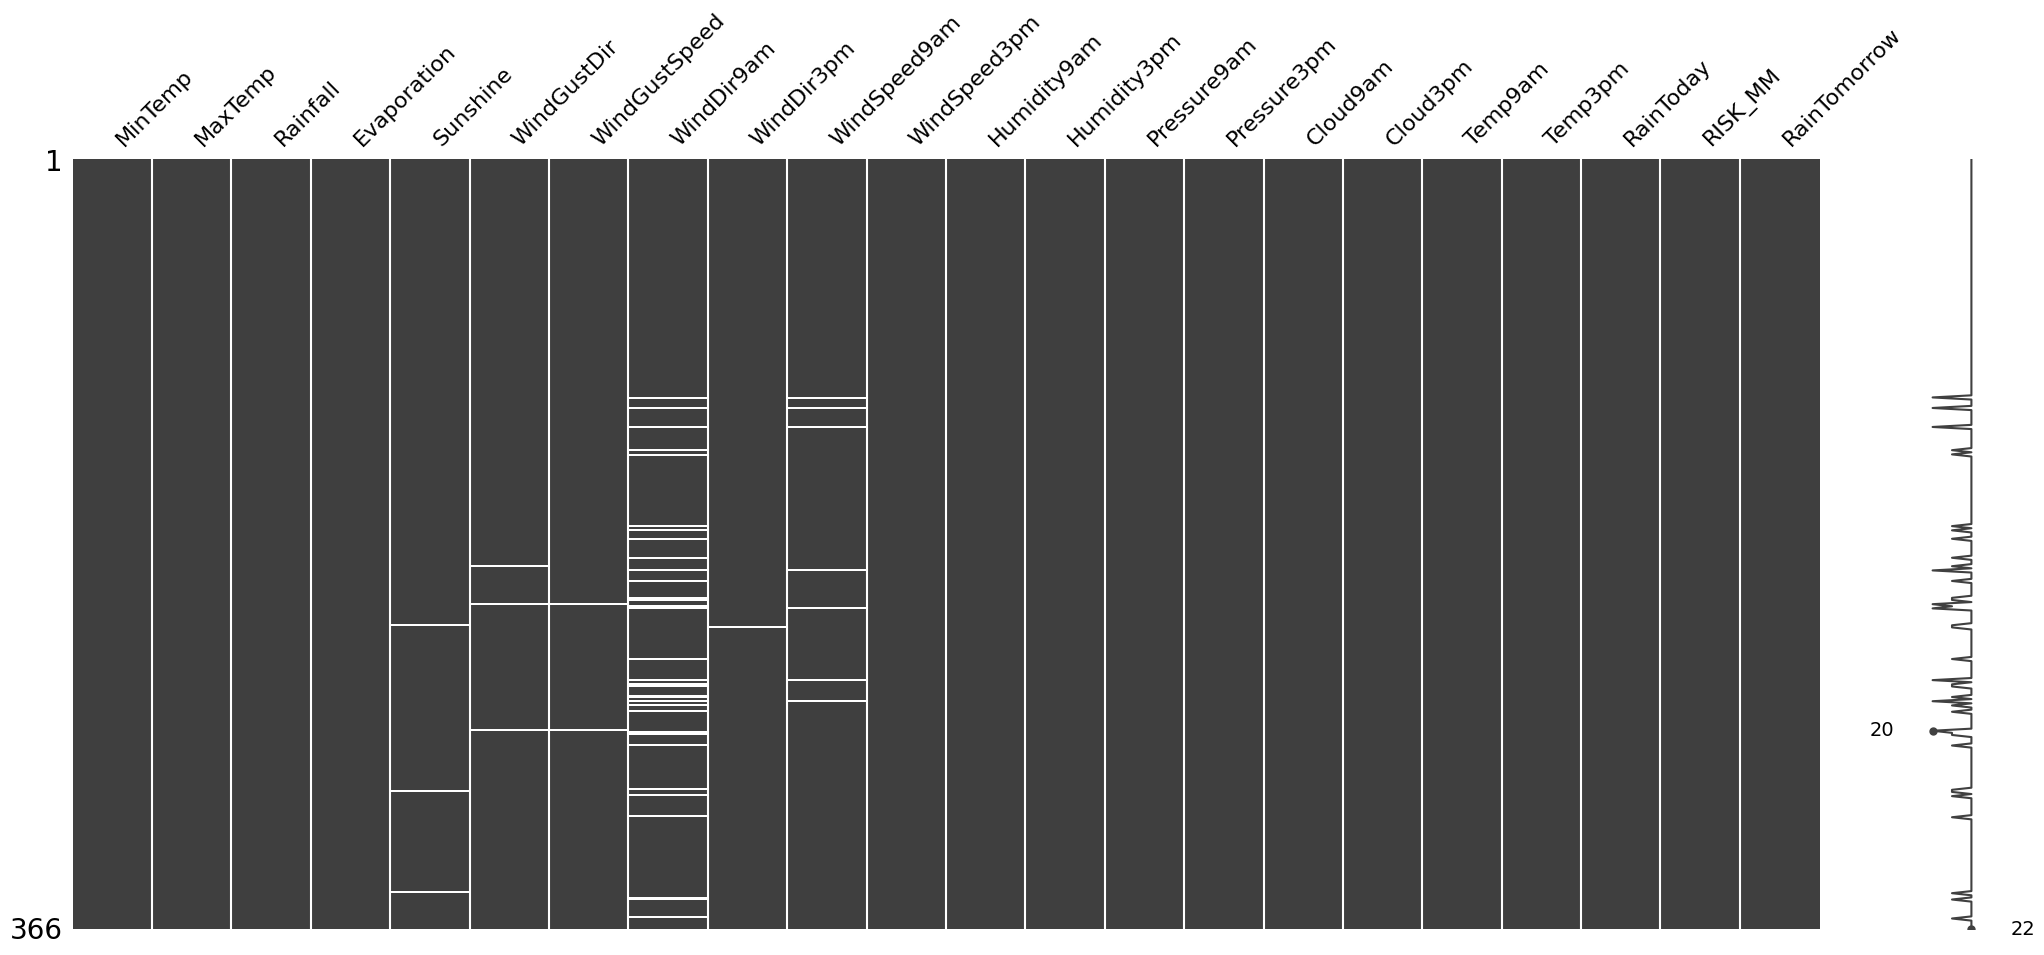

In [ ]:
msno.matrix(data)       # To display missing no in a matrix

<Axes: >

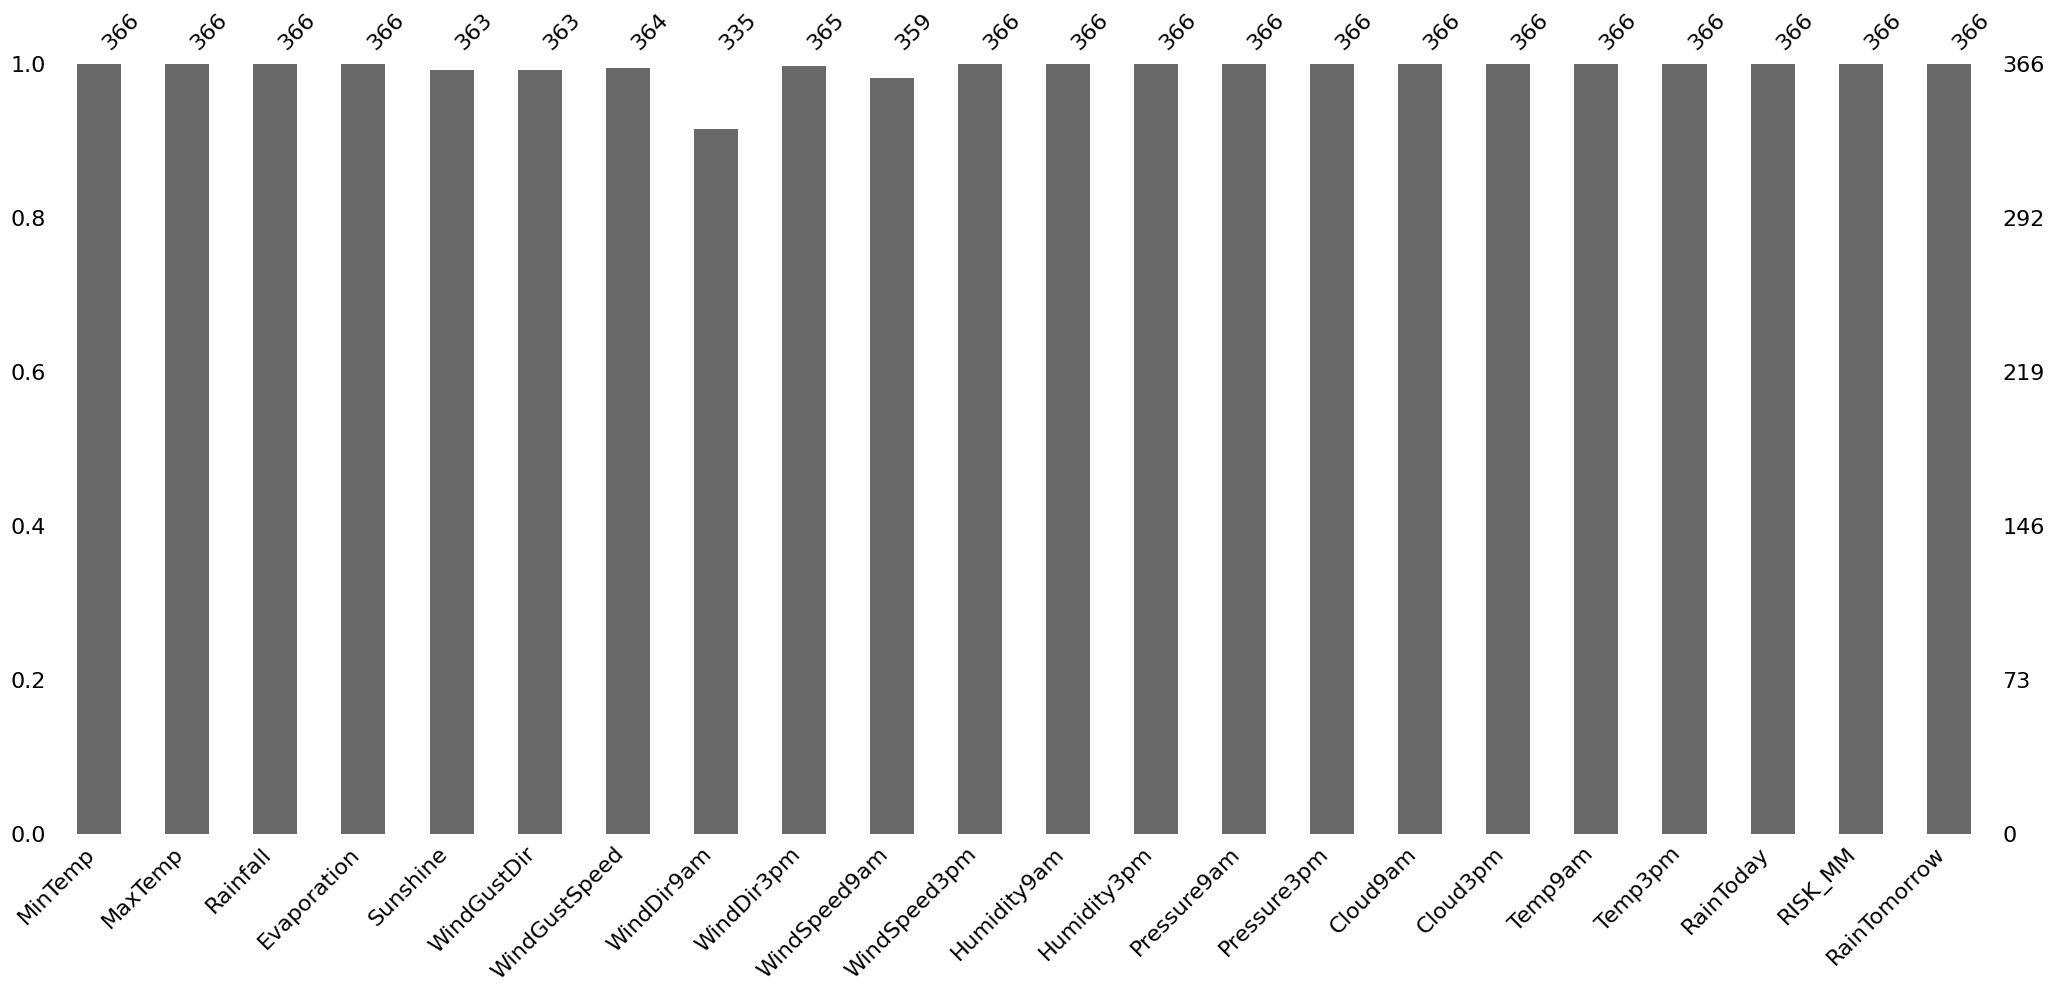

In [ ]:
msno.bar(data)    # To display missing values in bar plot

#### **Categorical Features**

In [ ]:
category_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Categorical feature:', category_feature)

Categorical feature: ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### **Numerical Features**

In [ ]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Numerical feature:', numerical_feature)

Numerical feature: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


### **Data Visualization**

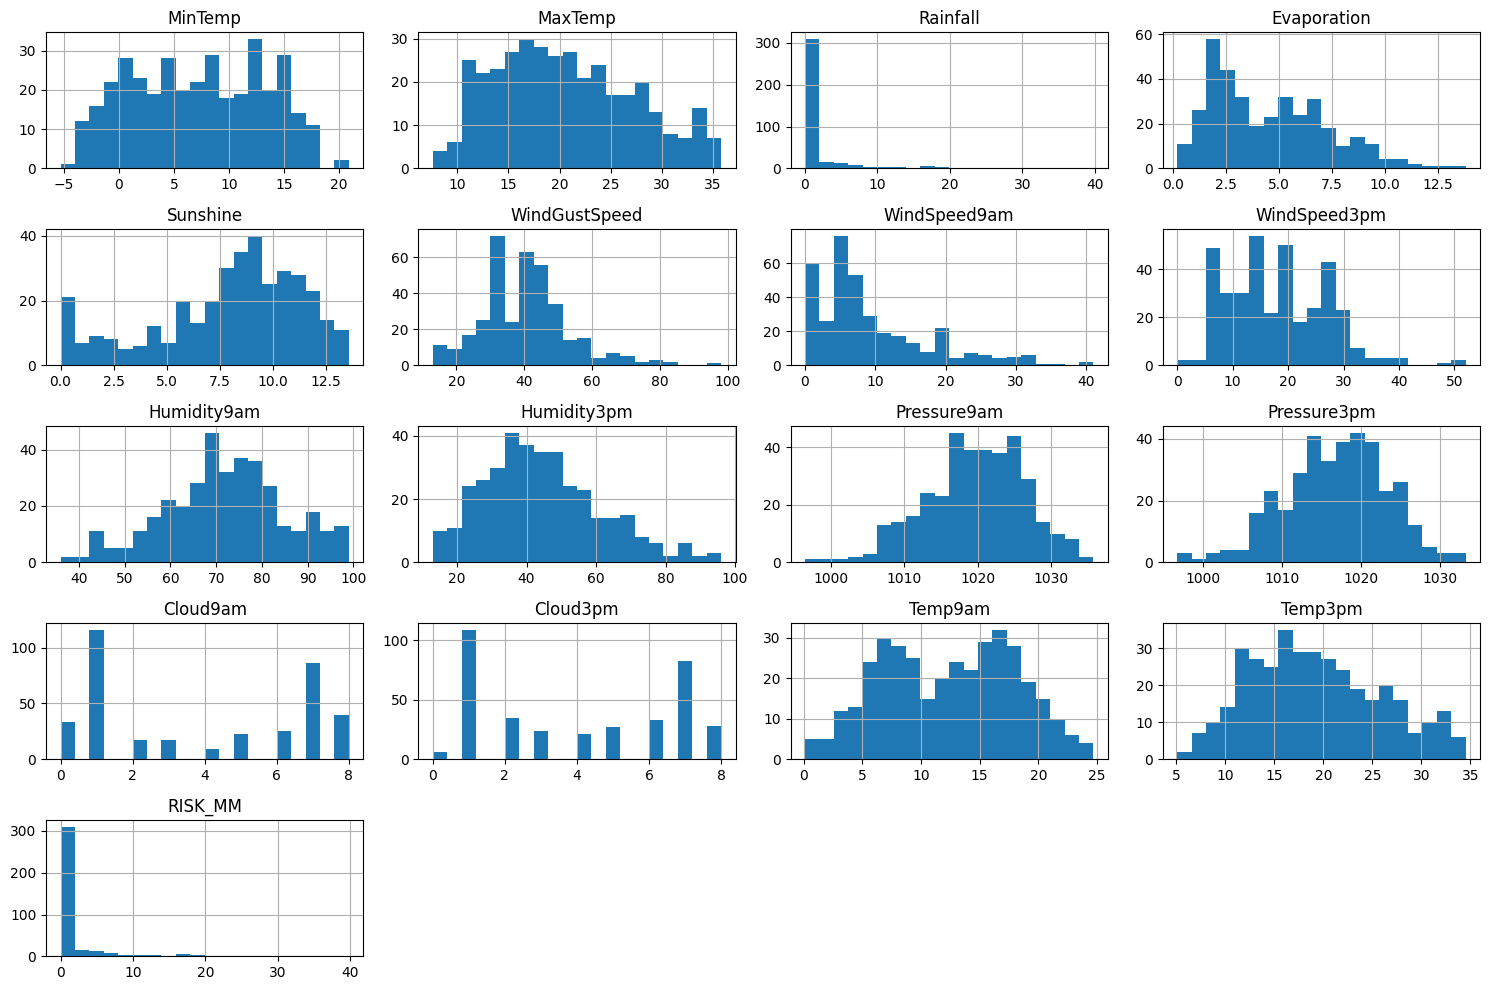

In [ ]:
data.hist(figsize=(15,10), bins = 20)       # To display the histogram of numerical features
plt.tight_layout()
plt.show()

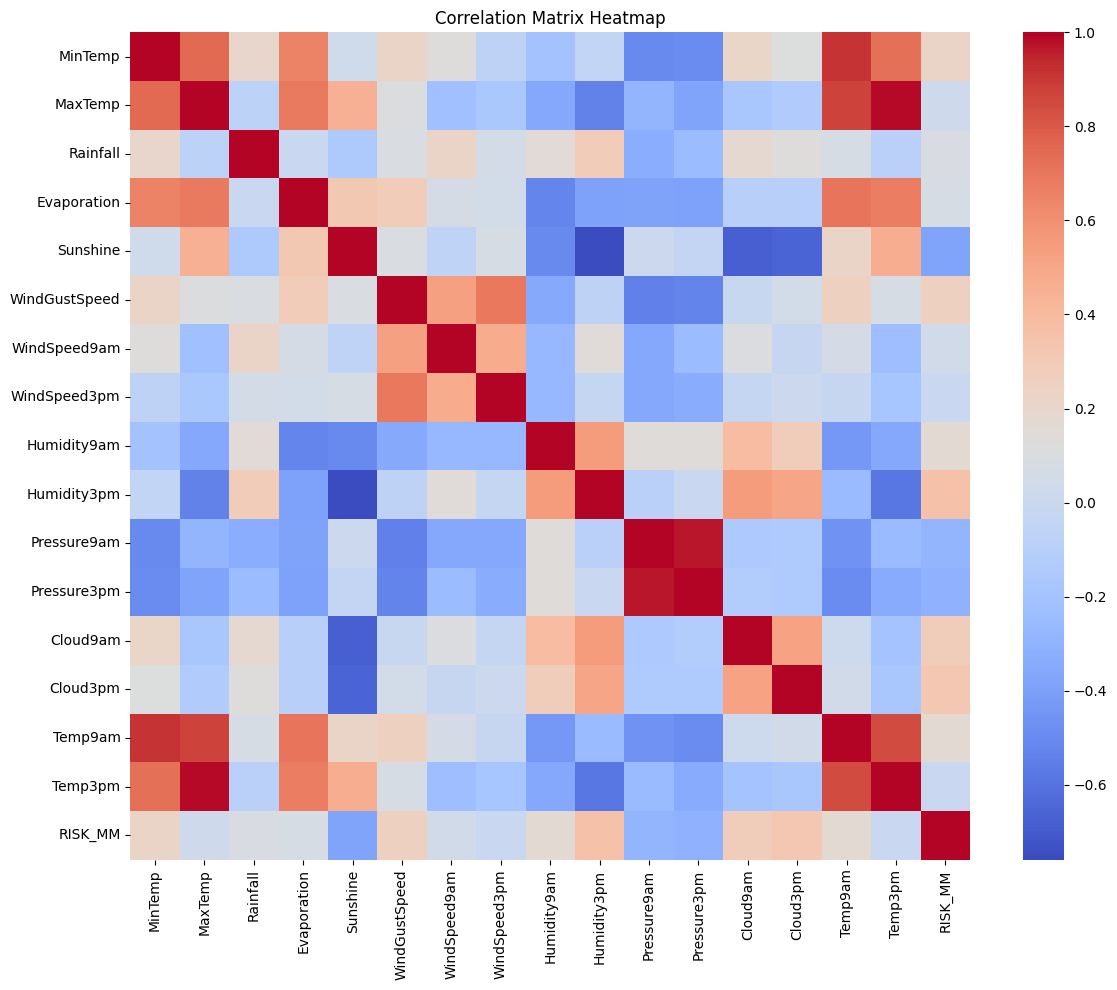

In [ ]:
# Remove rows with 'object' data type
data_numeric = data.select_dtypes(exclude=['object'])

# Calculate the correlation matrix
corr_matrix = data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

### **Data Cleaning**

#### **Handle missing data**


In [ ]:
data.dropna(inplace=True)
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [ ]:
print('Categorical feature:', category_feature)

Categorical feature: ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in category_feature:
    data[feature] = le.fit_transform(data[feature])

Encoded features:
```
['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
```
Example: 'Yes' → 1, 'No' → 0

### **Feature Engineering & Model Building**

#### **Feature Engineering:**

##### **Feature Selection**

In [ ]:
from sklearn.model_selection import train_test_split    #Importing train_test_split from sklearn model selection

In [ ]:
x = data.drop(['RainTomorrow'], axis=1)     # Data without the 'RainTomorrow' column
y = data[['RainTomorrow']]                  # Data with only the 'RainTomorrow' column

In [ ]:
# Use train_test_split to separate training and testing set in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Before scaling, replace infinite values with NaN and then impute them
x_train = x_train.replace([np.inf, -np.inf], np.nan)
x_test = x_test.replace([np.inf, -np.inf], np.nan)

In [ ]:
# Impute NaN values using the mean
for column in x_train.columns:
    x_train[column] = x_train[column].fillna(x_train[column].mean())
    x_test[column] = x_test[column].fillna(x_train[column].mean()) # use train set mean for test set


#### **Standardization of data**

In [ ]:
from sklearn.preprocessing import StandardScaler    #Importing StandardScaler from sklearn preprocessing

In [ ]:
scaler = StandardScaler()

# Fit the scaler to the training set, it will learn th parameter
scaler.fit(x_train)

StandardScaler()

#### **Scalarization of Data**

In [ ]:
# Standardize features using the fitted scaler for both training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled.shape

(262, 21)

### **Model Building**

#### **Logistic Regression**

In [ ]:
# Import Machine learning library

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train.squeeze())

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test_scaled)

Show some results

In [ ]:
# Convert y_pred into a pandas Series with the same index as y_test.head()
y_pred_series = pd.Series(y_pred[:5], index=y_test.head().index)

results_lr = pd.DataFrame({
    'Actual RainTomorrow': y_test['RainTomorrow'].head().replace({0: 'No', 1: 'Yes'}),
    'Logistic Regression': y_pred_series.replace({0: 'No', 1: 'Yes'})
})

# Reset the index
results_lr = results_lr.reset_index(drop=True)
print(results_lr)

  Actual RainTomorrow Logistic Regression
0                  No                  No
1                  No                  No
2                  No                  No
3                  No                  No
4                  No                  No


##### **Model Evaluation of Logistric Regression**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.83      0.91        12

    accuracy                           0.97        66
   macro avg       0.98      0.92      0.95        66
weighted avg       0.97      0.97      0.97        66



In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

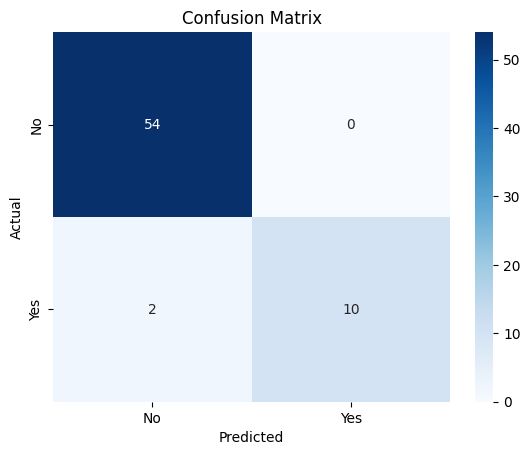

In [ ]:
# Define class labels
class_names = ['No', 'Yes']

# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# plt.savefig("Logistic Regression Confusion Matrix.png")
plt.show()
# files.download('Logistic Regression Confusion Matrix.png')

#### **K Nearest Neighbour**

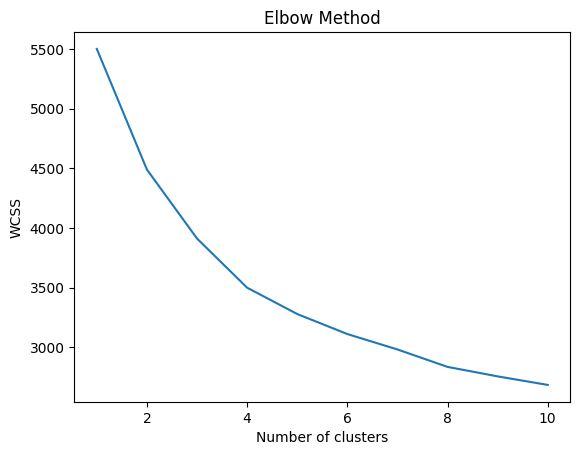

In [ ]:
# Determine k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
wcss = []    # within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The obvious elbow effect occurs at k = 4.

In [ ]:
# Train K-Neighbour model
neigh = KNeighborsClassifier(n_neighbors = 4).fit(x_train_scaled, y_train.values.ravel())
neigh

KNeighborsClassifier(n_neighbors=4)

In [ ]:
yhat = neigh.predict(x_test_scaled)

print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(x_train_scaled)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.8778625954198473
Test set Accuracy:  0.8333333333333334


Show some Results

In [ ]:
# Convert yhat into a pandas Series with the same index as y_test.head()
yhat_series = pd.Series(yhat[:5], index=y_test.head().index)

results_knn = pd.DataFrame({
    'Actual RainTomorrow': y_test['RainTomorrow'].head().replace({0: 'No', 1: 'Yes'}),
    'KNN Prediction': yhat_series.replace({0: 'No', 1: 'Yes'})
})

# Reset the index
results_knn = results_knn.reset_index(drop=True)
print(results_knn)

  Actual RainTomorrow KNN Prediction
0                  No             No
1                  No             No
2                  No             No
3                  No             No
4                  No             No


##### **Model Evaluation of KNN**

In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        54
           1       1.00      0.08      0.15        12

    accuracy                           0.83        66
   macro avg       0.92      0.54      0.53        66
weighted avg       0.86      0.83      0.77        66



In [ ]:
# Calculating the confusion matrix
cm_knn = confusion_matrix(y_test, yhat)

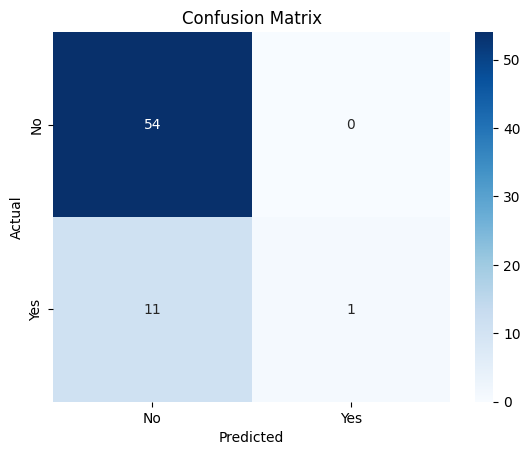

In [ ]:
# Define class labels
class_names = ['No', 'Yes']

# Display the confusion matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# plt.savefig('KNN Confusion Matrix.png')
plt.show()
# files.download('KNN Confusion Matrix.png')